<a href="https://colab.research.google.com/github/ScottHsieh-SH/1st-DL-CVMarathon/blob/master/%E5%BD%B1%E5%83%8F%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#google抓圖已失效模組

In [ ]:
#此模組已失效

!  pip install google_images_download
# -*- coding: utf-8 -*-
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()

arguments = {"keywords": "dog",
              "limit": 20,
              "print_urls": True}

paths = response.download(arguments)
print(paths)

#bs4抓圖

如果想要使用 Python 來下載網頁上的資料，最基本的作法就是以 requests 模組建立適當的 HTTP 請求，透過 HTTP 請求從網頁伺服器下載指定的資料，這種方式雖然步驟比較繁瑣，也需要一點通訊協定的基礎，但是絕大部分的網路爬蟲或除錯問題都可以靠這個架構解決，是資深網路程式設計師必備的工具之一。

Beautiful Soup 是一個 Python 的函式庫模組，可以讓開發者僅須撰寫非常少量的程式碼，就可以快速解析網頁 HTML 碼，從中翠取出使用者有興趣的資料、去蕪存菁，降低網路爬蟲程式的開發門檻、加快程式撰寫速度。

Beautiful Soup 的運作方式就是讀取 HTML 原始碼，自動進行解析並產生一個 BeautifulSoup 物件，此物件中包含了整個 HTML 文件的結構樹，有了這個結構樹之後，就可以輕鬆找出任何有興趣的資料了。

In [ ]:
import requests #請求HTTP
from bs4 import BeautifulSoup

google_url = 'https://www.google.com/search?ei=gAhqXciWMbCSr7wPgLaqiAE&yv=3&tbm=isch&q={}&vet=10ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB.gAhqXciWMbCSr7wPgLaqiAE.i&ved=0ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'
res = requests.get(google_url.format('戴口罩的人', 0))
soup = BeautifulSoup(res.text, 'lxml' )

In [ ]:
for alink in soup.select('a img'):
    if alink.get('data-src'):
        print(alink.get('data-src'))
        print('======================')

#抓人臉

In [ ]:
def getPicture(path, url):
    res = requests.get(url)
    with open('{}/{}.jpg'.format(path, url.split('tbn:')[1]) , 'wb') as f:
        f.write(res.content)

In [ ]:
import requests
import os
from bs4 import BeautifulSoup
google_url = 'https://www.google.com/search?ei=gAhqXciWMbCSr7wPgLaqiAE&yv=3&tbm=isch&q={}&vet=10ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB.gAhqXciWMbCSr7wPgLaqiAE.i&ved=0ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'

def getIdolImage(path, term, pagenum): # path路徑/ term要抓的圖的搜尋/ pagenum抓幾頁的資料
    if not os.path.exists(path):
        os.mkdir(path)       #創造儲存路徑
    for p in range(pagenum):
        res = requests.get(google_url.format(term, p* 100))
        soup = BeautifulSoup(res.text, 'lxml' )
        for alink in soup.select('a img'):
            if alink.get('data-src'):
                getPicture(path, alink.get('data-src'))

In [ ]:
getIdolImage('facenomask','人臉', 2)

In [ ]:
getIdolImage('facemask','戴口罩的人', 2)

#使用OpenCV 擷取人臉部分

In [ ]:
import cv2 as cv

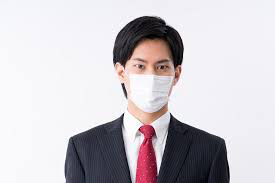

In [ ]:
from PIL import Image
im = Image.open('//content/facemask/ANd9GcQGw_D2nHKb6KBUkF88mMdRWgdpLGEes_v_9dm5rSZfo5vRYIQ&s.jpg') #複製左邊圖片路徑
im

In [ ]:
! wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2020-10-12 11:56:20--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.1s    

2020-10-12 11:56:20 (8.72 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



链接：https://www.zhihu.com/question/31353595/answer/60826602

簡單概括(可能概括的不是很準確，但是我的語言功底也就到這了，見諒)的話就是，xml本身是一種格式規範，是一種包含了數據以及數據說明的文本格式規範。 接下來煮幾個栗子說明一下。比如，我們要給對方傳輸一段數據，數據內容是“too young,too simple,sometimes naive”，要將這段話按照屬性拆分為三個數據的話，就是，年齡too young，閱歷too simple，結果sometimes naive。我們都知道程序不像人，可以體會字面意思，並自動拆分出數據，因此，我們需要幫助程序做拆分，因此出現了各種各樣的數據格式以及拆分方式。比如，可以是這樣的數據為“too young,too simple,sometimes naive”然後按照逗號拆分，第一部分為年齡，第二部分為閱歷，第三部分為結果。也可以是這樣的數據為“too_young**too_simple*sometimes_naive”從數據開頭開始截取前面十一個字符，去掉*號並把下劃線替換為空格作為第一部分，再截取接下來的十一個字符同樣去掉*並替換下劃線為空格作為第二部分，最後把剩下的字符同樣去*號體會空格作為第三部分。這兩種方式都可以用來容納數據並能夠被解析，但是不直觀，通用性也不好，而且如果出現超過限定字數的字符串就容納不了，也可能出現數據本身就下劃線字符導致需要做轉義。基於這種情況，出現了xml這種數據格式，上面的數據用XML表示的話可以是這樣<person age="too young" experience="too simple" result="sometimes naive" />也可以是這樣<person>
    <age value="too young" />
    <experience value="too simple" />
    <result value="sometimes naive" />
</person>兩種方式都是xml，都很直觀，附帶了對數據的說明，並且具備通用的格式規範可以讓程序做解析。如果用json格式來表示的話，就是下面這樣{
    "age":"too young",
    "experience":"too simple",
    "result":"sometimes naive"
}看出來沒，其實數據都是一樣的，不同的只是數據的格式而已，同樣的數據，我用xml格式傳給你，你用xml格式解析出三個數據，用json格式傳給你，你就用json格式解析出三個數據，還可以我本地保存的是xml格式的數據，我自己先解析出三個數據，然後構造成json格式傳給你，你解析json格式，獲得三個數據，再自己構造成xml格式保存起來，說白了，不管是xml還是json，都只是包裝數據的不同格式而已，重要的是其中含有的數據，而不是包裝的格式。發佈於2015-08-26​贊同632​​53 條評論​分享​收藏​喜歡收起​繼續瀏覽內容知乎發現更大的世界打開Chrome繼續Tim Chen​編程話題下的優秀回答者166人讚同了該回答估計沒多少人知道XML其實是微軟做的或者說是主要推動者，而且現在管XML的人就坐在離我10米遠，正在苦逼地調bug。簡單回答下題主的問題。XML就是種定義數據的標機語言，並沒有定義如何傳輸，你可以把他放在http get的response裡面，也可以直接拷貝一個xml文件到u盤裡。其擴展xsd定義了xml的schema，而xslt又定義了xml的轉換方式，這些使得xml更加強大。比如我見過用xslt來自動生成測試代碼的。從應用來講，各種config文件是xml的一個重要應用。數據文件也能用xml來保存，比如office文件。另外，SOAP協議的載體也是基於XML；ATOM也是基於XML用來表達要傳輸的數據，雖然現在json用得更多點。

In [ ]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('//content/facemask/ANd9GcQGw_D2nHKb6KBUkF88mMdRWgdpLGEes_v_9dm5rSZfo5vRYIQ&s.jpg')
img.shape

(183, 275, 3)

In [ ]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[120,  44,  62,  62]], dtype=int32)

In [ ]:
x,y,w,h = faces[0]

In [ ]:
box = (x, y, x+w, y+h)

In [ ]:
crpim = im.crop(box).resize((64,64))

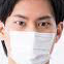

In [ ]:
crpim

In [ ]:
#集體擷取臉

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        if len(faces) == 1:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((64,64))
            crpim.save(dest + filename)

In [ ]:
cropIdolFace('facemask/', 'facemask_face/')

In [ ]:
cropIdolFace('facenomask/', 'facenomask_face/')

#使用 CNN 建立人臉識別模型

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Initialising the CNN
classifier = tf.keras.Sequential()

# Convolution
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=(3, 3), 
                                      padding = 'same',
                                      input_shape = (64, 64, 3), 
                                      activation = 'relu'))
# Max Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=(3, 3), 
                                      padding = 'same', 
                                      activation = 'relu'))
# Max Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(tf.keras.layers.Flatten())

# Fully Connected
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu')) 
classifier.add(tf.keras.layers.Dropout(rate=0.1)) 
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu')) 
classifier.add(tf.keras.layers.Dropout(rate=0.1)) 
classifier.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier.summary()

In [ ]:
classifier.compile(optimizer = 'adam', 
                        loss ='binary_crossentropy', 
                     metrics = ['accuracy'])

#圖像增廣技術

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

#將資料分為訓練與測試資料集

In [ ]:
import os
if not os.path.exists('train/'):
    os.mkdir('train/')
if not os.path.exists('test/'):
    os.mkdir('test/')

In [ ]:
import os
from sklearn.model_selection import train_test_split

def splitDataset(dirs):
    dataset = list(os.listdir(dirs))
    train_data, test_data = train_test_split(dataset, test_size= 0.2, random_state = 42)
    
    if not os.path.exists('train/'+dirs):
        os.mkdir('train/'+dirs)
    if not os.path.exists('test/'+dirs):
        os.mkdir('test/'+dirs)

    for f in train_data:
        os.rename(dirs + f, 'train/'+ dirs + f)
    for f in test_data:
        os.rename(dirs + f, 'test/' + dirs +f)

In [ ]:
splitDataset('facenomask_face/')

In [ ]:
splitDataset('facemask_face/')

In [ ]:
training_set = train_datagen.flow_from_directory(
    'train/', target_size = (64, 64),
     batch_size = 16,
     class_mode = 'binary')

Found 82 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
    'test/', target_size = (64, 64),
    batch_size = 30, 
    class_mode = 'binary')

Found 22 images belonging to 2 classes.


In [ ]:
history = classifier.fit_generator(training_set,
                         epochs=10,
                         validation_steps=16,
                         verbose = 1,
                         validation_data = test_set)

Epoch 1/10
6/6 [==============================] - 1s 88ms/step - loss: 0.1401 - accuracy: 0.9878 - val_loss: 0.1128 - val_accuracy: 0.9545
Epoch 2/10
6/6 [==============================] - 0s 77ms/step - loss: 0.1529 - accuracy: 0.9512
Epoch 3/10
6/6 [==============================] - 0s 76ms/step - loss: 0.0749 - accuracy: 0.9756
Epoch 4/10
6/6 [==============================] - 0s 78ms/step - loss: 0.0858 - accuracy: 0.9878
Epoch 5/10
6/6 [==============================] - 0s 73ms/step - loss: 0.0889 - accuracy: 0.9756
Epoch 6/10
6/6 [==============================] - 0s 72ms/step - loss: 0.0752 - accuracy: 0.9634
Epoch 7/10
6/6 [==============================] - 0s 74ms/step - loss: 0.0666 - accuracy: 0.9878
Epoch 8/10
6/6 [==============================] - 0s 74ms/step - loss: 0.0621 - accuracy: 0.9756
Epoch 9/10
6/6 [==============================] - 1s 87ms/step - loss: 0.0369 - accuracy: 0.9878
Epoch 10/10
6/6 [==============================] - 0s 73ms/step - loss: 0.0533 - accu

#實驗結果 無口罩

In [ ]:
! wget https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTWn7uyj0JEpJaQDJnQT_jwLPJNvD-3tv31lQ&usqp=CAU  #輸入要檢測的照片網址

--2020-10-12 13:08:28--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTWn7uyj0JEpJaQDJnQT_jwLPJNvD-3tv31lQ
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.129.100, 74.125.129.139, 74.125.129.113, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.129.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12547 (12K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcTWn7uyj0JEpJaQDJnQT_jwLPJNvD-3tv31lQ’

images?q=tbn:ANd9Gc 100%[===================>]  12.25K  --.-KB/s    in 0s      

2020-10-12 13:08:28 (41.5 MB/s) - ‘images?q=tbn:ANd9GcTWn7uyj0JEpJaQDJnQT_jwLPJNvD-3tv31lQ’ saved [12547/12547]



In [ ]:
img = cv.imread('images?q=tbn:ANd9GcTWn7uyj0JEpJaQDJnQT_jwLPJNvD-3tv31lQ')

In [ ]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)  #人臉擷取

In [ ]:
faces  #人臉位置

array([[47, 39, 51, 51]], dtype=int32)

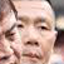

In [ ]:
from PIL import Image
im = Image.open('images?q=tbn:ANd9GcTWn7uyj0JEpJaQDJnQT_jwLPJNvD-3tv31lQ')
x,y,w,h = faces[0]
box     = (x, y, x+w, y+h)
crpim   = im.crop(box).resize((64,64))  #擷取人臉位置
crpim

In [ ]:
crpim.save('predict_face.jpg')

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('predict_face.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [ ]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 64, 64, 3)

In [ ]:
classifier.predict_classes(test_image)

array([[1]], dtype=int32)

In [ ]:
training_set.class_indices

{'facemask_face': 0, 'facenomask_face': 1}

#實驗結果 有口罩

In [ ]:
! wget https://image.cache.storm.mg/styles/smg-800x533-fp-wm/s3/media/image/2020/05/07/20200507-104941_U4040_M610201_428c.jpg?itok=LuMrSI2b

--2020-10-12 13:22:59--  https://image.cache.storm.mg/styles/smg-800x533-fp-wm/s3/media/image/2020/05/07/20200507-104941_U4040_M610201_428c.jpg?itok=LuMrSI2b
Resolving image.cache.storm.mg (image.cache.storm.mg)... 99.84.251.111, 99.84.251.37, 99.84.251.90, ...
Connecting to image.cache.storm.mg (image.cache.storm.mg)|99.84.251.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54001 (53K) [image/jpeg]
Saving to: ‘20200507-104941_U4040_M610201_428c.jpg?itok=LuMrSI2b’

20200507-104941_U40 100%[===================>]  52.74K   160KB/s    in 0.3s    

2020-10-12 13:23:00 (160 KB/s) - ‘20200507-104941_U4040_M610201_428c.jpg?itok=LuMrSI2b’ saved [54001/54001]



In [ ]:
img = cv.imread('20200507-104941_U4040_M610201_428c.jpg?itok=LuMrSI2b')
img

In [ ]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)

In [ ]:
faces

array([[483,  87,  86,  86],
       [545,  89, 105, 105]], dtype=int32)

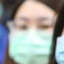

In [ ]:
from PIL import Image
im = Image.open('20200507-104941_U4040_M610201_428c.jpg?itok=LuMrSI2b')
x,y,w,h = faces[0]
box     = (x, y, x+w, y+h)
crpim   = im.crop(box).resize((64,64))
crpim

In [ ]:
crpim.save('predict_face1.jpg')

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('predict_face1.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [ ]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 64, 64, 3)

In [ ]:
classifier.predict_classes(test_image)

array([[0]], dtype=int32)

In [ ]:
training_set.class_indices

{'facemask_face': 0, 'facenomask_face': 1}

#YOLO


In [ ]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5913, done.
remote: Total 5913 (delta 0), reused 0 (delta 0), pack-reused 5913
Receiving objects: 100% (5913/5913), 6.34 MiB | 19.25 MiB/s, done.
Resolving deltas: 100% (3916/3916), done.


In [ ]:
! cd darknet; head Makefile

GPU=0
CUDNN=0
OPENCV=0
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]


修改 makefile

GPU=1
CUDNN=1
OPENCV=1

In [ ]:
! sed -i "s/GPU=0/GPU=1/g" /content/darknet/Makefile
! sed -i "s/CUDNN=0/CUDNN=1/g" /content/darknet/Makefile
! sed -i "s/OPENCV=0/OPENCV=1/g" /content/darknet/Makefile

In [ ]:
! head /content/darknet/Makefile 

GPU=1
CUDNN=1
OPENCV=1
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]


In [ ]:
! cd darknet; make

https://www.kaggle.com/gooogr/yolo-medical-mask-dataset/data

#台灣口罩數據集

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   #連結google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! cp "/content/drive/My Drive/archive.zip" /content/   # 載入GOOGLE DRIVE上的檔案檔案

In [ ]:
! unzip /content/archive.zip > data_unzip.log   #解壓縮 # >data_unzip.log 將用不到的log檔移走

In [ ]:
! cp "/content/drive/My Drive/maskdata.zip" /content/   # 載入檔案

In [ ]:
! unzip /content/maskdata.zip > data_unzip.log 

In [ ]:
from PIL import Image
img = Image.open('/content//Dataset/Medical_Masks_Dataset/images/1.jpg')
img

In [ ]:
! cat /content//Dataset/Medical_Masks_Dataset/yolo_labels/1.txt

1 0.0975 0.2388888888888889 0.05125 0.06222222222222222
1 0.2625 0.2061111111111111 0.045 0.06555555555555556
1 0.1559375 0.29 0.020625 0.04
1 0.3378125 0.24888888888888888 0.025625 0.04888888888888889
1 0.4253125 0.2388888888888889 0.036875 0.08
1 0.53125 0.25833333333333336 0.04 0.08555555555555555
1 0.713125 0.2627777777777778 0.02875 0.08333333333333333
1 0.8634375 0.2461111111111111 0.038125 0.07666666666666666
1 0.583125 0.3383333333333333 0.01 0.021111111111111112
1 0.9890625 0.3605555555555556 0.011875 0.021111111111111112
1 0.9765625 0.3688888888888889 0.014375 0.02666666666666667


In [ ]:
! rm -rf /content/cfg_mask
! mkdir /content/cfg_mask

In [ ]:
import os
datasets = ['/content//Dataset/Medical_Masks_Dataset/images/'+ f for f in os.listdir('/content//Dataset/Medical_Masks_Dataset/images/') if not f.endswith('.txt')]
len(datasets)

670

In [ ]:
#import os
#datasets = ['/content//Dataset/Medical_Masks_Dataset/yolo_labels/'+ f for f in os.listdir('/content//Dataset/Medical_Masks_Dataset/yolo_labels/') if not f.endswith('.txt')]
#len(datasets)

0

In [ ]:
with open('/content/cfg_mask/train.txt', 'w') as f:
    f.write('\n'.join(datasets))

In [ ]:
! head /content/cfg_mask/train.txt

/content//Dataset/Medical_Masks_Dataset/images/494.png
/content//Dataset/Medical_Masks_Dataset/images/129.jpg
/content//Dataset/Medical_Masks_Dataset/images/149.jpg
/content//Dataset/Medical_Masks_Dataset/images/496.jpg
/content//Dataset/Medical_Masks_Dataset/images/222.jpg
/content//Dataset/Medical_Masks_Dataset/images/42.jpg
/content//Dataset/Medical_Masks_Dataset/images/264.jpg
/content//Dataset/Medical_Masks_Dataset/images/354.jpg
/content//Dataset/Medical_Masks_Dataset/images/223.jpg
/content//Dataset/Medical_Masks_Dataset/images/138.jpg


In [ ]:
import os
datasets = ['/content//Dataset/Medical_Masks_Dataset/test_images/'+ f for f in os.listdir('/content//Dataset/Medical_Masks_Dataset/test_images/') if f.endswith('.jpg') or f.endswith('.jpeg') ]
len(datasets)

8

In [ ]:
with open('/content/cfg_mask/test.txt', 'w') as f:
    f.write('\n'.join(datasets))

In [ ]:
! head /content/cfg_mask/test.txt

/content//Dataset/Medical_Masks_Dataset/test_images/676.jpeg
/content//Dataset/Medical_Masks_Dataset/test_images/674.jpg
/content//Dataset/Medical_Masks_Dataset/test_images/678.jpg
/content//Dataset/Medical_Masks_Dataset/test_images/671.jpeg
/content//Dataset/Medical_Masks_Dataset/test_images/675.jpg
/content//Dataset/Medical_Masks_Dataset/test_images/677.jpg
/content//Dataset/Medical_Masks_Dataset/test_images/672.jpeg
/content//Dataset/Medical_Masks_Dataset/test_images/673.jpg

In [ ]:
! cp "/content/Dataset/Medical_Masks_Dataset/classes.txt" cfg_mask/

In [ ]:
! head /content/cfg_mask/classes.txt

bad
good
non

In [ ]:
! cp "/content/drive/My Drive/obj.data" cfg_mask/

In [ ]:
! head /content/cfg_mask/obj.data

classes= 3
train  = /content/cfg_mask/train.txt
valid  = /content/cfg_mask/test.txt
names  = /content/cfg_mask/obj.names
backup = /content/cfg_mask/weights/

In [ ]:
!ln -fs "//content/drive/My Drive" app

ln: failed to create symbolic link 'app/My Drive': Operation not supported


In [ ]:
! cp /content/darknet/cfg/yolov3-tiny.cfg /content/Dataset/  

In [ ]:
! sed -n -e 127p -e 135p -e 171p -e 177p /content/Dataset/yolov3-tiny.cfg

filters=255
classes=80
filters=255
classes=80


In [ ]:
!ln -fs "/content/drive/My Drive" app

In [ ]:
! sed -i "s/backup = \/content\/cfg_mask\/weights\//backup = \/content\/app\/aidataset\/weights\//g" /content/cfg_mask/obj.data

sed: can't read /content/cfg_mask/obj.data: No such file or directory


In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-10-16 14:54:33--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1   0%[                    ] 167.70K   223KB/s               ^C
